In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('darkgrid')

/kaggle/input/heart-disease-dataset/heart.csv


# Data Dictionary:
1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect


**In target column 1 represents (Heart Attack) and 0 (NO Heart Attack)**

In [2]:
cd = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
cd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
cd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
cd.shape

(1025, 14)

In [6]:
cd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
cd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
corr = cd.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

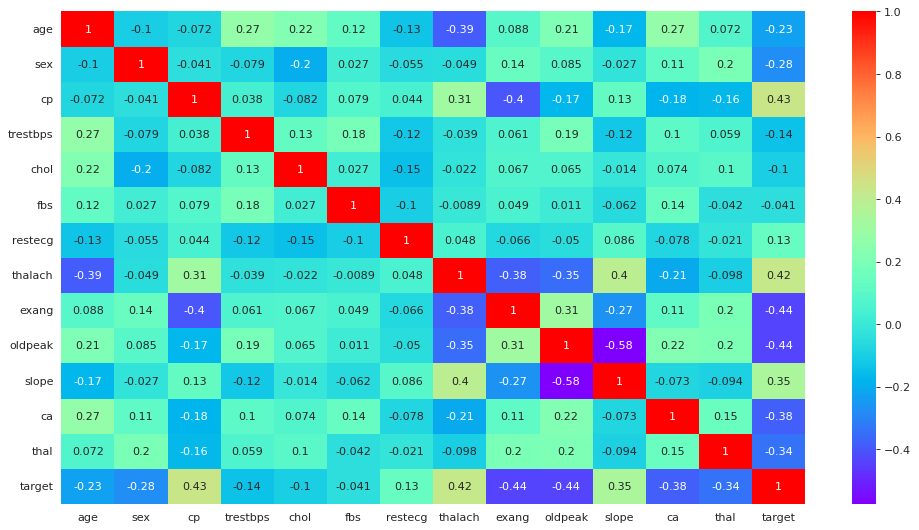

In [9]:
plt.figure(figsize=(15,8), dpi=80)
sns.heatmap(data=corr, annot=True, cmap='rainbow')

# What age group is most vulnerable or has a large number of patients with a higher risk of heart attack?

In [10]:
# Grouping the age column 
hrt_atck = pd.cut(cd['age'], bins=[29, 39, 49, 59, 69, 79], labels=['29-38', '39-48', '49-58', '59-68', '69-78']).value_counts().rename_axis('age_group').reset_index(name='counts')
hrt_atck

,age_group,counts
0,49-58,422
1,59-68,275
2,39-48,237
3,29-38,53
4,69-78,34


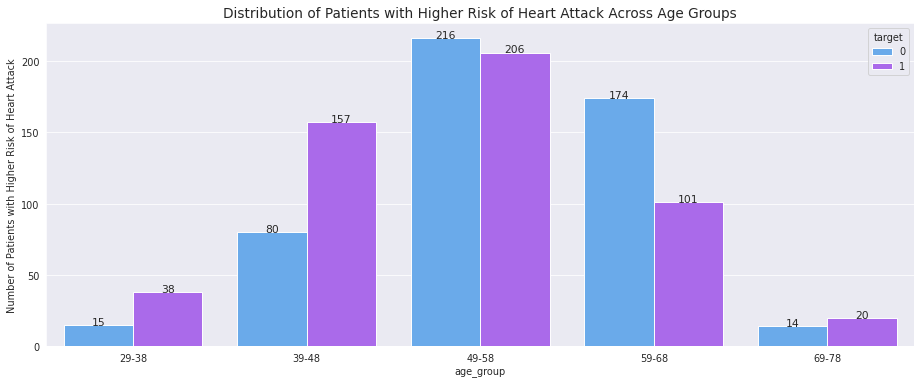

In [11]:
# Creating age groups based on specified bins and labels
cd['age_group'] = pd.cut(cd['age'], bins=[29, 39, 49, 59, 69, 79], labels=['29-38', '39-48', '49-58', '59-68', '69-78'])

plt.figure(figsize=(16, 6), dpi=70)
ax = sns.countplot(x= 'age_group', hue='target', data=cd, palette='cool')

# labels inside the chart
for i, v in enumerate(ax.patches):
    height = v.get_height()
    ax.text(v.get_x() + v.get_width() / 2.,
            height,
            '{:1.0f}'.format(height),
            ha="center", fontsize=11)

plt.title('Distribution of Patients with Higher Risk of Heart Attack Across Age Groups', size=14)
plt.ylabel('Number of Patients with Higher Risk of Heart Attack')
plt.show()

# Are men mostly prone to heart attacks or women?

In [12]:
hrt_actk=cd.groupby('sex')['target'].value_counts()
hrt_actk

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: count, dtype: int64

In [13]:
# Grouping data by 'sex' and 'target' to get counts
sex_target_counts = cd.groupby(['sex', 'target']).size().reset_index(name='count')

fig = px.bar(sex_target_counts, x='sex', y='count', color='target', 
             labels={'sex': 'Sex', 'count': 'Count', 'target': 'Heart Attack'},
             title='Distribution of Heart Attacks by Gender',
             barmode='group',
             width=700)

fig.show() 

# What chest pain types pose a severe risk of a heart attack?

In [14]:
cp = cd.groupby('cp')['target'].value_counts()
cp

cp  target
0   0         375
    1         122
1   1         134
    0          33
2   1         219
    0          65
3   1          51
    0          26
Name: count, dtype: int64

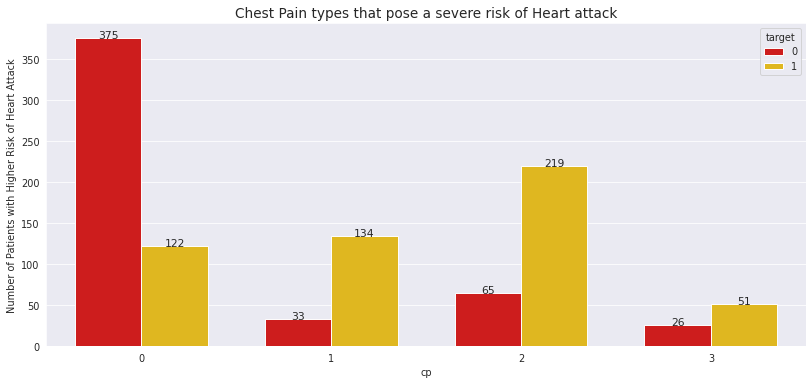

In [15]:
plt.figure(figsize=(14, 6), dpi=70)
ax = sns.countplot(x= 'cp', hue='target', data=cd, palette='hot', width=0.7)

for i, v in enumerate(ax.patches):
    height = v.get_height()
    ax.text(v.get_x() + v.get_width() / 2.,
            height,
            '{:1.0f}'.format(height),
            ha="center", fontsize=11)

plt.title('Chest Pain types that pose a severe risk of Heart attack', size=14)
plt.ylabel('Number of Patients with Higher Risk of Heart Attack')
plt.show()

# How fasting blood sugar is related to heart attack?

In [16]:
cd.groupby(['fbs', 'target']).size()

fbs  target
0    0         417
     1         455
1    0          82
     1          71
dtype: int64

In [17]:
fbs_target_counts = cd.groupby(['fbs', 'target']).size().reset_index(name='count')
fig = px.bar(fbs_target_counts, x='fbs', y='count', color='target', 
             labels={'fbs': 'fbs', 'count': 'Count', 'target': 'Heart Attack'},
             title='Fasting Blood Sugar & Heart Attacks',
             barmode='group',
             width=700)
fig.show()

# What type of thalassemia severely leads to heart attack?

In [18]:
cd.groupby('thal')['target'].value_counts()

thal  target
0     0           4
      1           3
1     0          43
      1          21
2     1         412
      0         132
3     0         320
      1          90
Name: count, dtype: int64

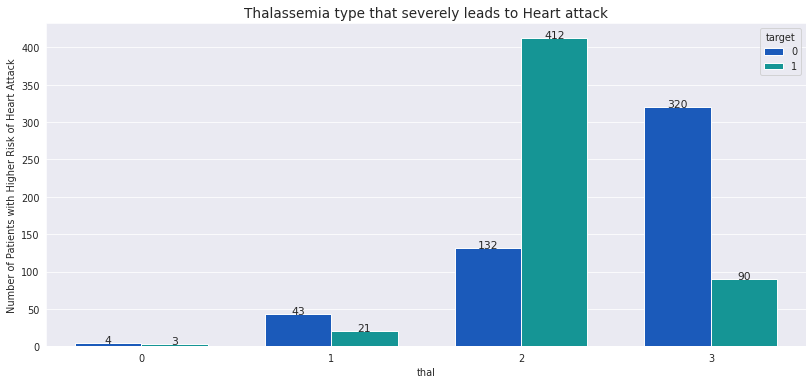

In [19]:
plt.figure(figsize=(14, 6), dpi=70)
ax = sns.countplot(x= 'thal', hue='target', data=cd, palette='winter', width=0.7)

for i, v in enumerate(ax.patches):
    height = v.get_height()
    ax.text(v.get_x() + v.get_width() / 2.,
            height,
            '{:1.0f}'.format(height),
            ha="center", fontsize=11)

plt.title('Thalassemia type that severely leads to Heart attack', size=14)
plt.ylabel('Number of Patients with Higher Risk of Heart Attack')
plt.show()

# Due to cholesterol, how many patients are at higher risk?

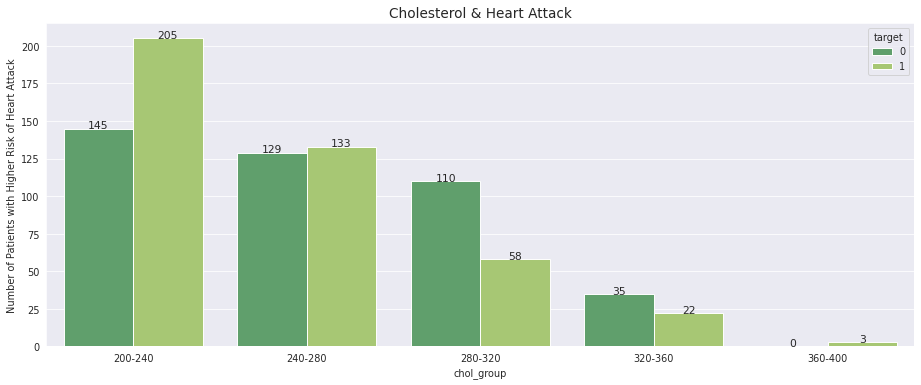

In [20]:
cd['chol_group'] = pd.cut(cd['chol'], bins=[200, 240, 280, 320, 360, 400], labels=['200-240', '240-280', '280-320', '320-360', '360-400'])
cd['chol_group']
plt.figure(figsize=(16, 6), dpi=70)
ax = sns.countplot(x= 'chol_group', hue='target', data=cd, palette='summer')

for i, v in enumerate(ax.patches):
    height = v.get_height()
    ax.text(v.get_x() + v.get_width() / 2.,
            height,
            '{:1.0f}'.format(height),
            ha="center", fontsize=11)

plt.title('Cholesterol & Heart Attack', size=14)
plt.ylabel('Number of Patients with Higher Risk of Heart Attack')
plt.show()

# How many patients have different numbers of major vessels colored by fluoroscopy?

In [21]:
cd.ca.value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

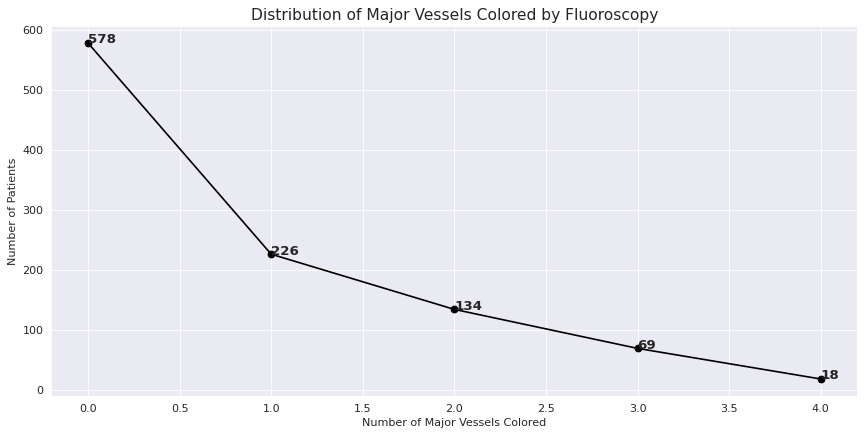

In [22]:
vessel_counts = cd['ca'].value_counts().sort_index()
plt.figure(figsize=(13, 6), dpi=80)
plt.plot(vessel_counts.index, vessel_counts.values, color='black', marker='o')

for ind,score in zip(vessel_counts.index.values, vessel_counts.values):
    plt.text(ind,score,str(score), fontweight='bold', fontsize=12)
    
plt.xlabel('Number of Major Vessels Colored')
plt.ylabel('Number of Patients')
plt.title('Distribution of Major Vessels Colored by Fluoroscopy', size=14)

plt.show()

# What are the different resting electrocardiographic results and their frequencies?

In [23]:
cd.restecg.value_counts()

restecg
1    513
0    497
2     15
Name: count, dtype: int64

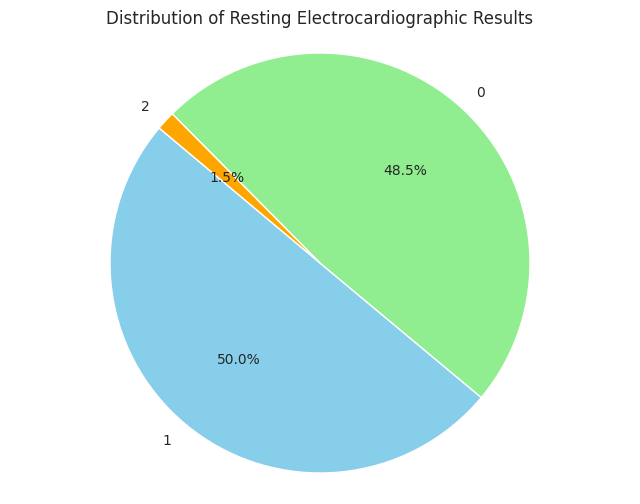

In [24]:
result_counts = cd['restecg'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange'])

plt.title('Distribution of Resting Electrocardiographic Results')

plt.axis('equal')  
plt.show()

# **Conclusion**
**The analysis highlights several key insights into heart health and associated risk factors. Age groups between 49-58 and 59-68 show increased vulnerability to heart attacks, with men demonstrating a higher incidence compared to women. Certain chest pain types, especially types 1 and 2, pose a higher risk of heart attack. While fasting blood sugar levels show no direct correlation, individuals with thalassemia type 2 are at a heightened risk. These findings emphasise the importance of understanding demographic and clinical factors in heart disease prevention.**